# K Means Clustering algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

- Here we can take more features and apply pca to reduce no. of features

In [81]:
X,y=make_blobs(n_samples =1000, centers = 3, n_features=2 )

In [63]:
X

array([[ 2.59344003, -7.8430453 ,  2.70042304, ..., -6.86998284,
        -6.09267989, -2.35024071],
       [ 4.59796769,  4.49936254,  7.2877667 , ...,  1.30110813,
         8.61981006,  3.05621588],
       [-2.13611992, -1.84718062,  8.41408645, ...,  0.71387308,
        -5.0932229 , -8.9055984 ],
       ...,
       [-0.81980955, -3.93232779,  6.02517122, ...,  9.17724615,
        -7.97185966, -3.55760438],
       [-2.32787027, -6.41196165, -7.11032382, ...,  4.93766129,
         2.63518331, -6.29320996],
       [ 1.90131404, -0.58082661, -5.10695967, ..., -7.36709205,
         5.74247308, -6.09601101]])

- y is having labels because of centres=3, here we are solving unsupervised ml and in unsupervised ml we take X and apply clusstering on top of it

In [64]:
y

array([12,  4,  2, 28, 17,  0, 38, 29, 29,  8, 15, 10, 33, 10, 20, 26, 37,
        0, 30, 49,  0, 21, 33, 34, 46, 24, 25, 12, 38, 25, 25, 49, 35, 43,
        5, 34, 42, 21, 19, 20, 41, 46, 22, 48,  8,  2, 49, 34,  9,  2, 32,
       19, 44, 28,  4, 25, 32, 36, 48,  7, 34, 21, 21, 41, 24, 10, 18, 21,
       23, 38, 10,  8, 15, 40, 27, 41, 12,  9, 27, 18,  9,  7,  6, 12, 35,
       29, 31, 21,  5,  5, 45, 47, 22, 41,  7, 23, 31, 18, 22, 12, 29, 25,
       26, 23,  5,  9, 49, 35, 45, 15, 32,  3, 39, 10, 14, 47, 20, 24, 33,
       48, 36, 38,  3,  6, 29, 33, 10, 41, 47, 31,  1,  3, 18, 27, 29, 24,
        9, 48,  8, 44, 36, 38,  6, 22, 28, 25, 13, 47, 46, 28, 31, 13, 46,
       41, 24, 11, 39, 41, 34, 44, 23, 49, 16, 26, 27, 37, 32,  4, 36,  7,
       32, 16, 35, 29,  4, 30, 25, 42, 42, 18,  9,  4, 43, 46, 44, 32, 15,
       41, 23, 34,  8,  2, 20,  0,  2, 40, 17, 30, 46, 37, 12, 11, 40,  9,
       38, 49, 39, 29,  1, 11, 18, 18, 49, 36, 10,  2,  0, 45, 16, 26, 33,
       19, 41, 24,  2, 45

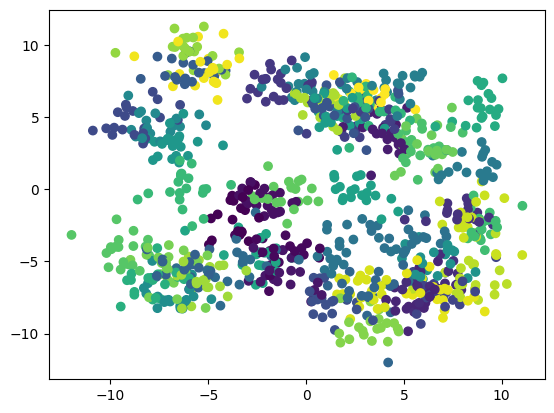

In [65]:
plt.scatter(X[:,0],X[:,1], c=y) # three clusters

- Now we have to find out these three clusters using k means

In [66]:
## Standardization --- feature scaling technique

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [54]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

In [68]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.cluster import KMeans

In [70]:
## Elbow method to select k value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [71]:
wcss # wccs value decreases as k increases

[33500.0,
 31794.46043509279,
 30515.03656447275,
 29199.631912106357,
 28644.903404288987,
 27303.700505129535,
 26321.565938299507,
 25794.68484415806,
 25012.56122052965,
 23530.45681062939]

Text(0, 0.5, 'WCSS')

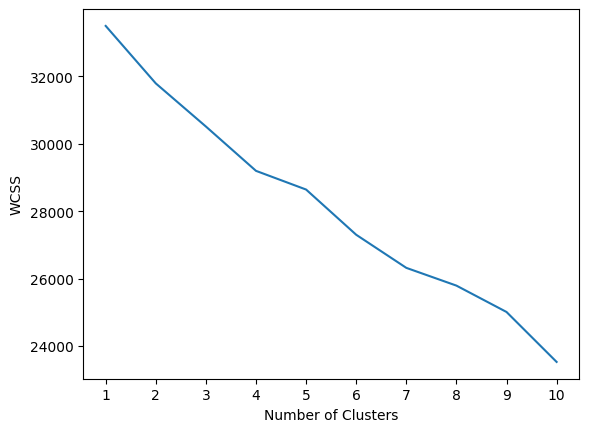

In [72]:
# how to find k 
# plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

- at 3 k-value is abruptly decreasing

In [61]:
# Now we will use k=3 and perform k-means clustering for X_train values

kmeans = KMeans(n_clusters = 3, init = "k-means++")

In [31]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0,
       2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2,
       1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2,

In [32]:
y_pred = kmeans.predict(X_test_scaled)

In [33]:
y_pred

array([1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1,
       0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2,
       1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2,
       0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2,
       0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2,
       1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0,
       2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1,
       2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2,
       2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0,

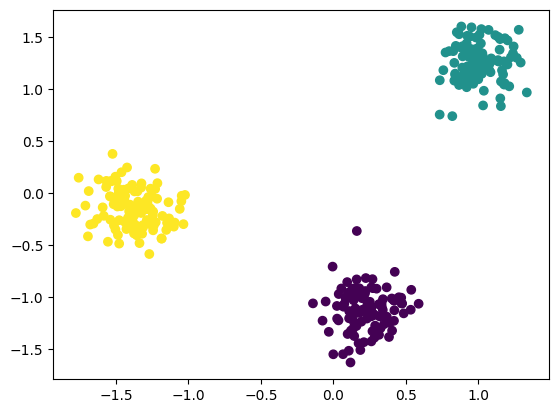

In [34]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

- validating k values because sometimes finding k value is not easy task

**  Validating k values has two ways
1. kneelocator
2. silhoutee scoring

In [36]:
# kneelocator
!pip install kneed

In [73]:
from kneed import KneeLocator

- KneeLocator need the observation of elbow curve we have 

In [74]:
kl = KneeLocator(range(1,11),wcss, curve="convex", direction="decreasing")

In [ ]:
print(kl.elbow)

None


In [77]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [78]:
silhoutte_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k , init = "k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhoutte_coefficients.append(score)

In [79]:
silhoutte_coefficients

[np.float64(0.05542828340297911),
 np.float64(0.07538834399843666),
 np.float64(0.09189559210090224),
 np.float64(0.10332407350318529),
 np.float64(0.10986402819648367),
 np.float64(0.11844263412998794),
 np.float64(0.1305945038209633),
 np.float64(0.1485180592189521),
 np.float64(0.17395366094223672)]

- using no.of clustering as k value where sihouette coefficeint is high 

Text(0, 0.5, 'Silhouette coeffecient')

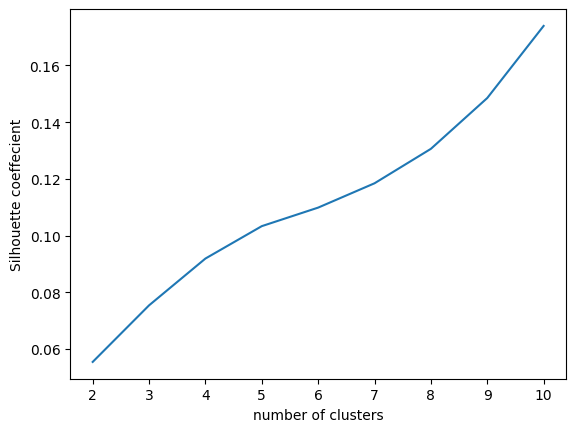

In [80]:
# plotting silhouette score
plt.plot(range(2,11), silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coeffecient")